In [2]:
!wget https://www.spataru.at/students/course_files/week4/loan.csv

--2021-01-18 12:06:44--  https://www.spataru.at/students/course_files/week4/loan.csv
Resolving www.spataru.at (www.spataru.at)... 81.19.159.92
Connecting to www.spataru.at (www.spataru.at)|81.19.159.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38013 (37K) [text/csv]
Saving to: ‘loan.csv.1’

loan.csv.1          100%[===================>]  37.12K   247KB/s    in 0.2s    

2021-01-18 12:06:45 (247 KB/s) - ‘loan.csv.1’ saved [38013/38013]



In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv("loan.csv")

# EDA

In [5]:
df.shape

(614, 13)

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.Loan_Status.value_counts()[0]/df.shape[0]

0.6872964169381107

In [8]:
px.bar(data_frame=df, x="Loan_Status")

In [9]:
px.histogram(data_frame=df, x="ApplicantIncome", color="Loan_Status")

In [10]:
px.histogram(data_frame=df, x="ApplicantIncome", color="Education")

In [11]:
df.Gender.isna().sum()

13

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]

In [14]:
impute = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")

In [15]:
df[categorical_features] = impute.fit_transform(df[categorical_features])

In [16]:
df.Gender.isna().sum()

0

In [17]:
df[["LoanAmount"]]

,LoanAmount
0,NaN
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


In [18]:
df["LoanAmount"] = impute.fit_transform(df[["LoanAmount"]])

In [19]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [20]:
df = df.drop("Loan_ID", axis=1)

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
df["Gender"] = df["Gender"].astype("category")

In [23]:
for col in categorical_features:
  df[col] = df[col].astype("category")

# Split Input and Output

In [24]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,120.0,360.0,1,0,0,0,0,0,0,1,0,1,1
1,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,1,1
3,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,1,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,1,1


In [26]:
df["Loan_Amount_Term"] = impute.fit_transform(df[["Loan_Amount_Term"]])

In [27]:
X = df[df.columns[:-1]]

In [28]:
y = df[[df.columns[-1]]]

# Decision Tree

In [29]:
model = DecisionTreeClassifier()

In [30]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(146.57572202166065, 211.4, 'X[11] <= 0.5\ngini = 0.43\nsamples = 614\nvalue = [192, 422]'),
 Text(29.813718411552347, 199.32, 'X[2] <= 547.5\ngini = 0.145\nsamples = 89\nvalue = [82, 7]'),
 Text(26.590613718411554, 187.24, 'X[1] <= 8115.0\ngini = 0.127\nsamples = 88\nvalue = [82, 6]'),
 Text(17.727075812274368, 175.16, 'X[0] <= 4316.5\ngini = 0.11\nsamples = 86\nvalue = [81, 5]'),
 Text(9.669314079422383, 163.07999999999998, 'X[3] <= 240.0\ngini = 0.036\nsamples = 54\nvalue = [53, 1]'),
 Text(6.446209386281589, 151.0, 'X[0] <= 2546.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(3.2231046931407943, 138.92000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(9.669314079422383, 138.92000000000002, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(12.892418772563177, 151.0, 'gini = 0.0\nsamples = 46\nvalue = [46, 0]'),
 Text(25.784837545126354, 163.07999999999998, 'X[0] <= 4934.0\ngini = 0.219\nsamples = 32\nvalue = [28, 4]'),
 Text(19.338628158844767, 151.0, 'X[12] 

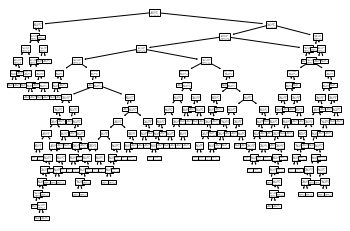

In [31]:
tree.plot_tree(model)

In [32]:
model.score(X,y)

1.0

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

# Evaluation

In [83]:
model = (max_depth=3, random_state=42)

In [84]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [85]:
y_pred = model.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred)

0.7980295566502463

In [87]:
precision_score(y_test, y_pred)

0.7678571428571429

In [89]:
recall_score(y_test,y_pred)

0.9847328244274809

In [90]:
f1_score(y_test, y_pred)

0.8628762541806019

# K-Folds Cross Validation

In [105]:
model = DecisionTreeClassifier(random_state=42,min_samples_leaf=29)
scores = cross_validate(model, X,y, cv=3, scoring=("accuracy", "recall", "f1"))

In [106]:
scores

{'fit_time': array([0.00890112, 0.00355983, 0.00386047]),
 'score_time': array([0.00312543, 0.00292015, 0.00379896]),
 'test_accuracy': array([0.8       , 0.79512195, 0.83333333]),
 'test_f1': array([0.87066246, 0.86875   , 0.89032258]),
 'test_recall': array([0.9787234 , 0.9858156 , 0.98571429])}

In [110]:
model = GaussianNB()
cross_validate(model, X,y, cv=3, scoring=("accuracy", "recall", "f1"))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



{'fit_time': array([0.00813293, 0.00383258, 0.00453615]),
 'score_time': array([0.00371909, 0.00400209, 0.00314593]),
 'test_accuracy': array([0.77560976, 0.76585366, 0.82843137]),
 'test_f1': array([0.85064935, 0.84810127, 0.88448845]),
 'test_recall': array([0.92907801, 0.95035461, 0.95714286])}

In [112]:
model = MultinomialNB()
cross_validate(model, X,y, cv=3, scoring=("accuracy", "recall", "f1"))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



{'fit_time': array([0.0067265 , 0.00309014, 0.0028367 ]),
 'score_time': array([0.00356317, 0.0042274 , 0.00286794]),
 'test_accuracy': array([0.49756098, 0.44878049, 0.46568627]),
 'test_f1': array([0.57613169, 0.55335968, 0.54393305]),
 'test_recall': array([0.4964539 , 0.4964539 , 0.46428571])}

In [117]:
model = KNeighborsClassifier(n_neighbors=5)
cross_validate(model, X,y, cv=3, scoring=("accuracy", "recall", "f1"))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



{'fit_time': array([0.00433588, 0.00390363, 0.00403929]),
 'score_time': array([0.01383734, 0.01143193, 0.01158452]),
 'test_accuracy': array([0.62926829, 0.5902439 , 0.59313725]),
 'test_f1': array([0.75324675, 0.73076923, 0.73139159]),
 'test_recall': array([0.82269504, 0.80851064, 0.80714286])}